# <center> Création d'un SVM </center>

**Source :**
    
Cours d'Openclassrooms : https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4722466-classifiez-vos-donnees-avec-une-svm-a-noyau

## Importations :

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# fonction de calcul du précision
from sklearn.metrics import accuracy_score

#Suppression des erreurs de type warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importation des données :

In [73]:
df = pd.read_csv("df.csv")
df.head()

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,...,col 132,col 133,col 134,col 135,col 136,col 137,col 138,col 139,col 140,Classe
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


---

## Fragmentation des données en jeu d'entraînement et de test

### Création de X et y

In [74]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("X shape :", X.shape)
print("y shape :", y.shape)

X shape : (4997, 140)
y shape : (4997,)


In [75]:
y.value_counts()

1.0    2918
0.0    2079
Name: Classe, dtype: int64

### Split Train/Test

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [77]:
liste = [X_train, X_test, y_train, y_test]

for x in liste :
    print(x.shape)

(3497, 140)
(1500, 140)
(3497,)
(1500,)


---

## Création du modèle

In [78]:
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=50)

# Nous entrainons la SVM sur le jeu d'entraînement
classifier.fit(X_train, y_train)

SVC(gamma=50)

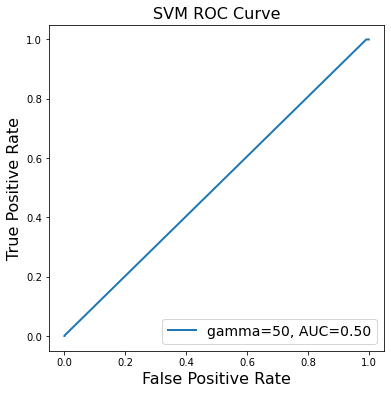

In [79]:
# prédire sur le jeu de test
y_test_pred = classifier.decision_function(X_test)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=50, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

## Autre modèle : 

In [80]:
# machine vecteurs de support
SVM = SVC(gamma='auto')
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print("SVM: "+str(accuracy_score(predictions, y_test)))

SVM: 0.9953333333333333


## Optimisation du SVM

In [82]:
from sklearn.model_selection import GridSearchCV

#Définition d'une plage de valeurs à tester = C ira de 1 à 100
penalite = [{'C': range(1,100)}]

#Tests avec 5 échantillon de Validation Croisée
recherche_optimisations = GridSearchCV(SVC(), penalite, cv=5)
recherche_optimisations.fit(X_train, y_train)

print("Le meilleur paramètre est :\t", recherche_optimisations.best_params_)

Le meilleur paramètre est :	 {'C': 3}


## Réentraînement du modèle avec le nouvel hyperparamètre

In [83]:
# machine vecteurs de support
SVM = SVC(C=17, gamma='auto')
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print("SVM optimisée :  ", accuracy_score(predictions, y_test))

SVM optimisée :   0.9946666666666667


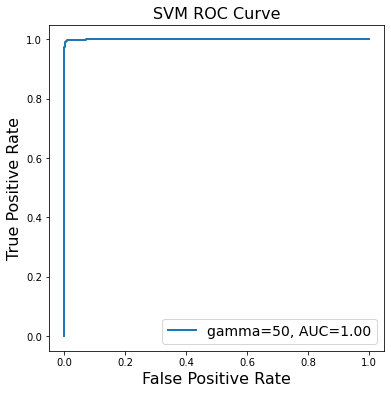

In [85]:
# prédire sur le jeu de test
y_test_pred = SVM.decision_function(X_test)

# construire la courbe ROC
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='gamma=50, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()